In [1]:
import numpy as np
import csv
from matplotlib import pyplot as plt

In [2]:
def M_size(n, d,memo):
    if (n, d) in memo:
        return memo[(n, d)]
    # If d = 1 we need only one row to get a 1-decodable matrix
    if d == 1:
        ans =  (1,n)
    # Base case: when n <= d, return identity matrix
    elif n <= d:
        ans = (n,n)
    
    # Case for M^n(d) when n > d and n < 1.5*(d+1)
    elif n < 1.5 * (d + 1):
        ans = (n-1,n)
    
    # Recursive case for n >= 1.5*(d+1)
    else:
        min_rows = n+1
        # Recursive construction of matrix M
        for i in range(2,int(np.ceil(n/2)) + 1):
            block_top = M_size(int(np.ceil(n / i)), int(np.floor(d / 2)),memo)
            block_bottom = M_size(int(np.ceil(n / i)), d,memo)
            rows = (block_top[0] * i) + block_bottom[0]
            min_rows = min(min_rows,rows)
            
        
        # Ensure the matrix has exactly n columns
        ans =  (min_rows,n)
    
    memo[(n,d)] = ans
    return ans

In [3]:
def plot_graph(n,step=5):
    d = step
    memo = {}
    array_d = []
    array_m = []
    for d in range(step,n,step):
        matrix_size = M_size(n,d,memo)
        array_d.append(d)
        array_m.append(matrix_size[0])
        # print(f'IBLT size with n = {n} , d = {d} : ({matrix_size[0]},{matrix_size[1]})')
        if matrix_size[0] > n: break
        
    x = array_d
    y = array_m
    max_size = [n] * len(x)
    plt.plot(x,y)
    # plt.plot(x,max_size,color='red')
    plt.grid()
    # plt.xticks(x)
    plt.xlabel('Maximal set size (d)')
    plt.ylabel('Number of cells in IBLT (m)')
    plt.title(f'Size of IBLT Vs Maximal Set Size for n = {n}')
    plt.show()

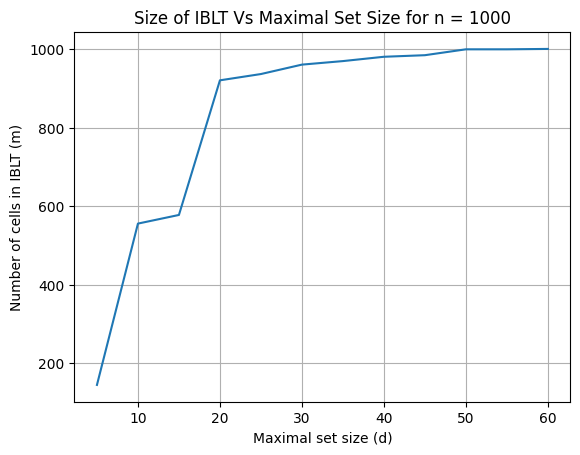

In [4]:
plot_graph(n=1000,step=5)

Data saved to memory_overheads.csv


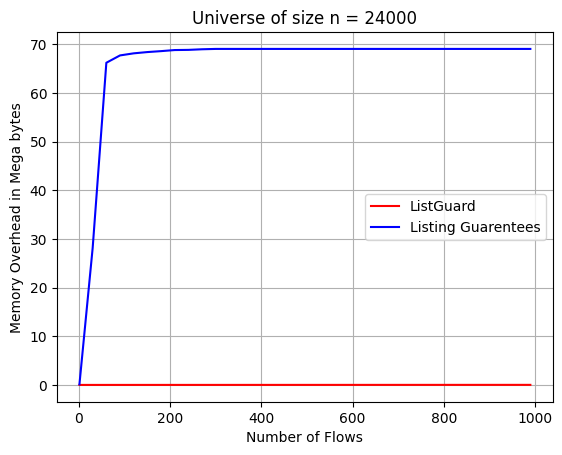

In [5]:
keySize = 4
valSize = 4
countSize = 2
n = 24000
step = 30
array_d = [1] + [i for i in range(step,min(n,1000),step)] 
p = 5
to_kb = 1024**2
memo = {}
hashSize = keySize + countSize
IBLT_cellSize = keySize + valSize + countSize
ListGuard = []
LFFZ = []
for d in array_d:
    prob = p/100
    ListGuard_IBLT_rows = np.ceil(d*1.295)
    sampled_flows_count = np.ceil(prob*d)
    listguard_memory = (ListGuard_IBLT_rows * IBLT_cellSize) + sampled_flows_count*keySize
    ListGuard.append(listguard_memory/to_kb)
    mapping_matrix =  M_size(n,d,memo)
    m = mapping_matrix[0]
    LFFZ_memory = np.ceil((m*n)/8) + (m * IBLT_cellSize) + (n*hashSize)
    LFFZ.append(LFFZ_memory/to_kb)


# File path for the CSV
output_file = "memory_overheads.csv"

# Write data to the CSV file
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Number of Flows", "ListGuard Memory Overhead (MB)", "LFFZ Memory Overhead (MB)"])
    
    # Write the rows
    for d, lg, lffz in zip(array_d, ListGuard, LFFZ):
        writer.writerow([d, lg, lffz])

print(f"Data saved to {output_file}")

plt.plot(array_d,ListGuard,color = 'red',label = 'ListGuard')
plt.plot(array_d,LFFZ,color = 'blue',label = 'Listing Guarentees')
plt.xlabel('Number of Flows')
plt.ylabel('Memory Overhead in Mega bytes')
plt.title(f'Universe of size n = {n}')
plt.legend()
plt.grid()
plt.show()